In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdisease/framingham_heart_disease.csv


**Resampling imbalanced data**

In binary classification problemas, data imbalance occurs when the number of instances in one class known as the majority class is significantly larger than the other class, known as the minority class. Resampling is a data processing method used to balance the dataset. The "imbalanced-learn" toolbox provides methods for resampling the data.

**An Overview of resampling methods**

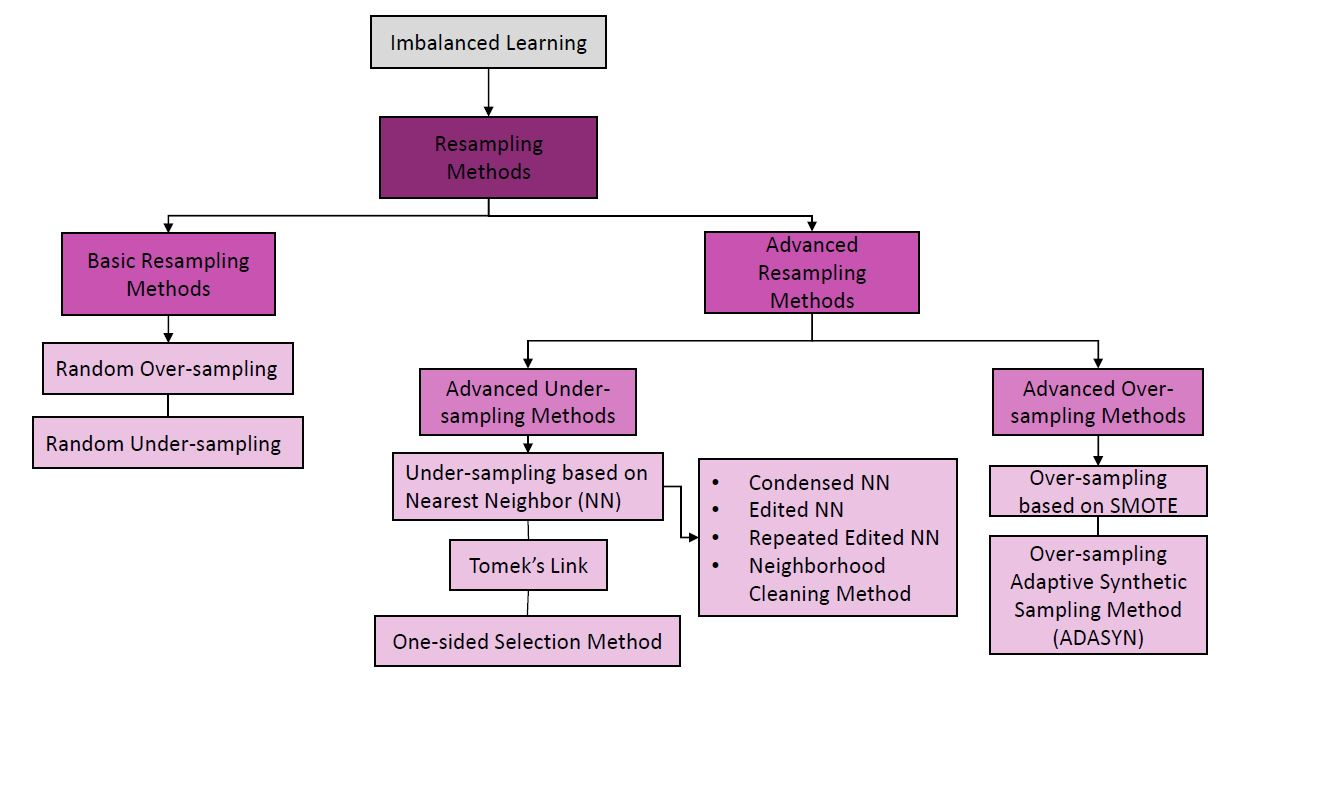

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Load spreadsheet
file = pd.read_csv('../input/heartdisease/framingham_heart_disease.csv')

#Exploratory data analysis
print (file.shape)
print (file.info())

(4238, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
No

In [4]:
data = pd.DataFrame (file)

fill_feat = ["glucose", "education", "BPMeds", "totChol", "cigsPerDay", "BMI", "heartRate"]
for i in fill_feat: 
    data[i].fillna(np.mean(data[i]),inplace=True)

In [5]:
#Normalization using Sklearn
Data = np.asarray(data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']])
Target = data['TenYearCHD']

#Scaling the data before training
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


Data = preprocessing.StandardScaler().fit(Data).transform(Data)
Data = pd.DataFrame (Data)
Data.columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
#print (Data.head())

Target = pd.DataFrame (Target)
Target.columns = ["label"]
#print(Target.head())

droplist = ['BPMeds', 'prevalentHyp','diabetes']
Data = Data.drop(droplist, axis = 1 )

X = Data
y = Target

Class 0: 3594
Class 1: 644
Proportion: 5.58 : 1


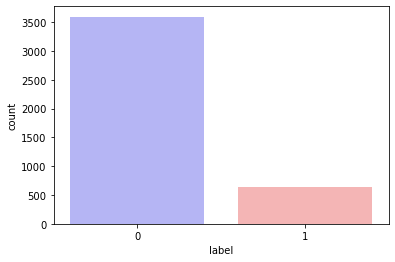

In [6]:
target_count = Target.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


count_class_N, count_class_P =Target.label.value_counts()

# Divide by class
Class_N = Target == 0
Class_P = Target == 1

#Plot the target
sb.countplot (x = Target.label, data = Data, palette = "bwr")
plt.show()

# Resampling methods for imbalance data

Resampling methods includes under-sampling the majority class, over-sampling the minority class or a combination of both.

**Under-sampling methods**

Using TensorFlow backend.


Class 0: 644
Class 1: 644
Proportion: 1.0 : 1


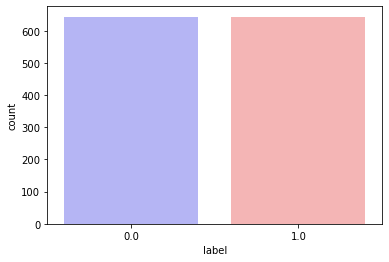

In [7]:
#Random under-sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)
X_res = pd.DataFrame(X_rus)
y_res = pd.DataFrame(y_rus)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

Class 0: 1084
Class 1: 644
Proportion: 1.68 : 1


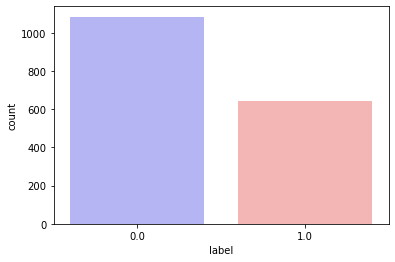

In [8]:
#Under-sampling based on the Condensed Nearest Neighbor
from imblearn.under_sampling import CondensedNearestNeighbour

con = CondensedNearestNeighbour()
X_con, y_con = con.fit_resample(X, y)
X_res = pd.DataFrame(X_con)
y_res = pd.DataFrame(y_con)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

Class 0: 2425
Class 1: 644
Proportion: 3.77 : 1


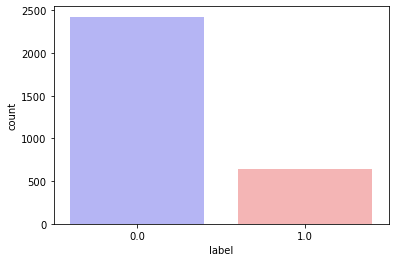

In [9]:
#Under-sampling based on the Edited Nearest Neighbor
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)
X_res = pd.DataFrame(X_enn)
y_res = pd.DataFrame(y_enn)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

Class 0: 1816
Class 1: 644
Proportion: 2.82 : 1


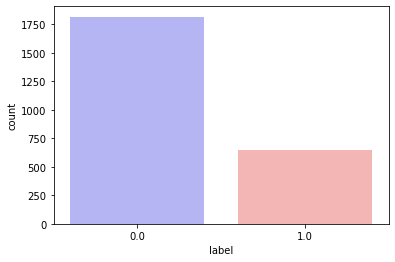

In [10]:
#Under-sampling based on the Repeated Edited Nearest Neighbor
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours()
X_renn, y_renn = renn.fit_resample(X, y)
X_res = pd.DataFrame(X_renn)
y_res = pd.DataFrame(y_renn)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

Class 0: 644
Class 1: 644
Proportion: 1.0 : 1


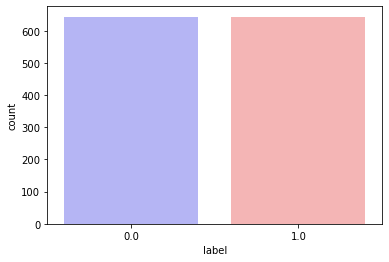

In [11]:
#Under-sampling using the cluster centroids
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy = 'majority')
X_cc, y_cc = cc.fit_sample(X, y)
X_res = pd.DataFrame(X_cc)
y_res = pd.DataFrame(y_cc)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

Class 0: 3402
Class 1: 644
Proportion: 5.28 : 1


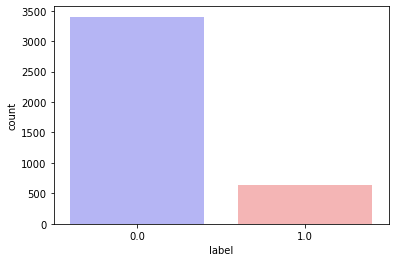

In [12]:
#Under-sampling based on one-sided selection
from imblearn.under_sampling import OneSidedSelection

os = OneSidedSelection()
X_os, y_os = os.fit_sample(X, y)
X_res = pd.DataFrame(X_os)
y_res = pd.DataFrame(y_os)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

Class 0: 3399
Class 1: 644
Proportion: 5.28 : 1


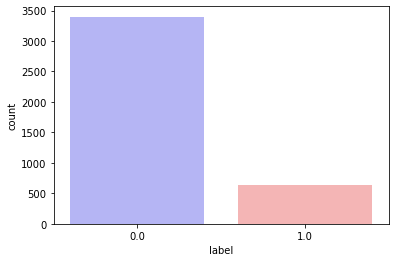

In [13]:
#Under-sampling based on removing the Tomek links
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_tl, y_tl = os.fit_sample(X, y)
X_res = pd.DataFrame(X_tl)
y_res = pd.DataFrame(y_tl)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

**Comparison of different under-sampling methods**  
In this example we have used KNN as claasifier.

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN


#Create a list of sampling methods
models = []
models.append(("Random Under-sampling", rus))
models.append(("Condensed Nearest Neighbor", con))
models.append(("Edited Nearest Neighbor", enn))
models.append(("Repeated Edited Nearest Neighbor", renn))
models.append(("Cluster Centroids", cc))
models.append(("One-sided Selection", os))
models.append(("Tomek Links", tomek))

#Evaluate each model in turn

def Evaluate(MODEL):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    knn = KNN()
    knn.fit(X_train, y_train.values.ravel()) 
    #Making predictions
    y_pred = knn.predict(X_test) 
    #print(classification_report(y_test, y_pred))
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", Accuracy)

for i in models:
    print ("Model:")  
    print (i)
    Evaluate(i)
    print ("******************************************")  

Model:
('Random Under-sampling', RandomUnderSampler(random_state=None, replacement=False,
                   sampling_strategy='auto'))
Accuracy: 0.8231132075471698
******************************************
Model:
('Condensed Nearest Neighbor', CondensedNearestNeighbour(n_jobs=None, n_neighbors=None, n_seeds_S=1,
                          random_state=None, sampling_strategy='auto'))
Accuracy: 0.8207547169811321
******************************************
Model:
('Edited Nearest Neighbor', EditedNearestNeighbours(kind_sel='all', n_jobs=None, n_neighbors=3,
                        sampling_strategy='auto'))
Accuracy: 0.8254716981132075
******************************************
Model:
('Repeated Edited Nearest Neighbor', RepeatedEditedNearestNeighbours(kind_sel='all', max_iter=100, n_jobs=None,
                                n_neighbors=3, sampling_strategy='auto'))
Accuracy: 0.8207547169811321
******************************************
Model:
('Cluster Centroids', ClusterCentroids(est

**Over-sampling methods**

Class 0: 3594
Class 1: 3594
Proportion: 1.0 : 1


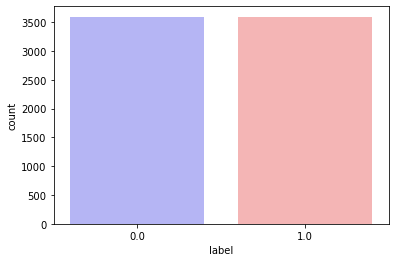

In [15]:
#Random over-samplong 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
X_res = pd.DataFrame(X_ros)
y_res = pd.DataFrame(y_ros)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

Class 0: 3594
Class 1: 3658
Proportion: 0.98 : 1


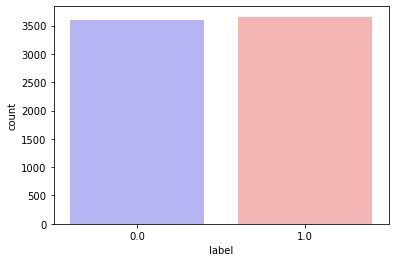

In [16]:
#Over-samplong using Adaptive Synthetic (ADASYN) sampling approach
from imblearn.over_sampling import ADASYN

ad = ADASYN()
X_ad, y_ad = ad.fit_sample(X, y)
X_res = pd.DataFrame(X_ad)
y_res = pd.DataFrame(y_ad)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

In [17]:
#Over-samplong using Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)
X_res = pd.DataFrame(X_sm)
y_res = pd.DataFrame(y_sm)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

NameError: name 'smote' is not defined

Class 0: 3594
Class 1: 3594
Proportion: 1.0 : 1


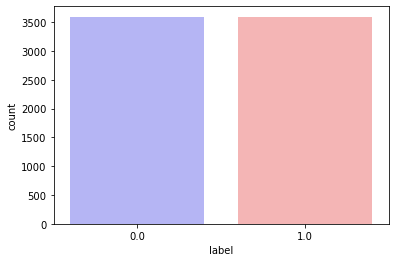

In [18]:
#Over-samplong using Synthetic Minority Over-sampling Technique (SMOTE) with SVM algorithm
from imblearn.over_sampling import SVMSMOTE

svmsm = SVMSMOTE()
X_sm, y_sm = svmsm.fit_sample(X, y)
X_res = pd.DataFrame(X_sm)
y_res = pd.DataFrame(y_sm)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

**Comparison of different over-sampling methods**  
In this example we have used KNN as claasifier.

In [19]:
#Create a list of sampling methods
models = []
models.append(("Random Over-sampling", ros))
models.append(("Adaptive Synthetic (ADASYN)", ad))
models.append(("Synthetic Minority Technique (SMOTE)", sm))
models.append(("SMOTE with SVM", svmsm))

#Evaluate each model in turn

def Evaluate(MODEL):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    knn = KNN()
    knn.fit(X_train, y_train.values.ravel()) 
    #Making predictions
    y_pred = knn.predict(X_test) 
    #print(classification_report(y_test, y_pred))
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", Accuracy)

for i in models:
    print ("Model:")  
    print (i)
    Evaluate(i)
    print ("******************************************")  

Model:
('Random Over-sampling', RandomOverSampler(random_state=None, sampling_strategy='auto'))
Accuracy: 0.8254716981132075
******************************************
Model:
('Adaptive Synthetic (ADASYN)', ADASYN(n_jobs=None, n_neighbors=5, random_state=None, sampling_strategy='auto'))
Accuracy: 0.8337264150943396
******************************************
Model:
('Synthetic Minority Technique (SMOTE)', SMOTE(k_neighbors=5, n_jobs=None, random_state=None, sampling_strategy='auto'))
Accuracy: 0.8384433962264151
******************************************
Model:
('SMOTE with SVM', SVMSMOTE(k_neighbors=5, m_neighbors=10, n_jobs=None, out_step=0.5,
         random_state=None, sampling_strategy='auto', svm_estimator=None))
Accuracy: 0.8372641509433962
******************************************


**Combination of over-sampling and under-sampling**

Class 0: 3594
Class 1: 3594
Proportion: 1.0 : 1


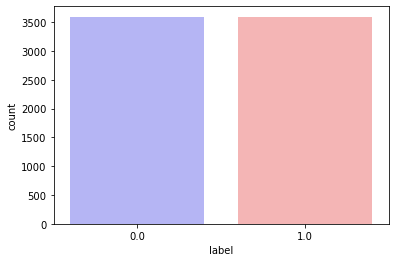

In [20]:
#Combination of ver-sampling and under-sampling using SMOTE and cleaning using Edited Nearest Neighbor.
from imblearn.combine import SMOTEENN

smenn = SMOTEENN()
X_smenn, y_smenn = smenn.fit_sample(X, y)
X_res = pd.DataFrame(X_sm)
y_res = pd.DataFrame(y_sm)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

**Comparison of combination methods**

Class 0: 3594
Class 1: 3594
Proportion: 1.0 : 1


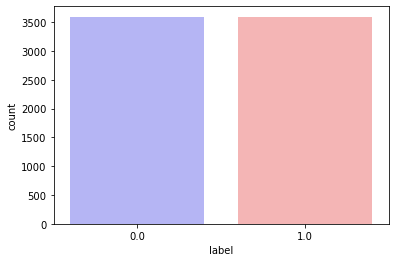

In [21]:
#Combination of ver-sampling and under-sampling using SMOTE and cleaning using Tomek links.
from imblearn.combine import SMOTETomek

smtomek = SMOTETomek()
X_smtomek, y_smtomek = smtomek.fit_sample(X, y)
X_res = pd.DataFrame(X_sm)
y_res = pd.DataFrame(y_sm)

New_data = pd.concat([X_res, y_res], axis=0)

target_count = New_data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_class_N, count_class_P = New_data.label.value_counts()

# Divide by class
Class_N = New_data.label == 0
Class_P = New_data.label == 1

#Plot the target
sb.countplot (x = New_data.label, data = New_data, palette = "bwr")
plt.show()

In [22]:
#Create a list of sampling methods
models = []
models.append(("SMOTE and cleaning using Edited Nearest Neighbor", smenn))
models.append(("SMOTE and cleaning using Tomek links", smtomek))

#Evaluate each model in turn

def Evaluate(MODEL):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    knn = KNN()
    knn.fit(X_train, y_train.values.ravel()) 
    #Making predictions
    y_pred = knn.predict(X_test) 
    #print(classification_report(y_test, y_pred))
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", Accuracy)

for i in models:
    print ("Model:")  
    print (i)
    Evaluate(i)
    print ("******************************************") 

Model:
('SMOTE and cleaning using Edited Nearest Neighbor', SMOTEENN(enn=None, n_jobs=None, random_state=None, sampling_strategy='auto',
         smote=None))
Accuracy: 0.8254716981132075
******************************************
Model:
('SMOTE and cleaning using Tomek links', SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='auto', smote=None,
           tomek=None))
Accuracy: 0.839622641509434
******************************************


**Recommended reading**

The imbalanced-learn documentation:
http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html

The imbalanced-learn GitHub:
https://github.com/scikit-learn-contrib/imbalanced-learn

Comparison of the combination of over- and under-sampling algorithms:
http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/combine/plot_comparison_combine.html

Chawla, Nitesh V., et al. "SMOTE: synthetic minority over-sampling technique." Journal of artificial intelligence research 16 (2002):
https://www.jair.org/media/953/live-953-2037-jair.pdf